In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/pollen-grain-image-classification")

print("Path to dataset files:", path)

100%|██████████| 24.1M/24.1M [00:00<00:00, 82.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/pollen-grain-image-classification/versions/1


In [2]:
# Remove this cell to use the path to the downloaded dataset
path ="/root/.cache/kagglehub/datasets/andrewmvd/pollen-grain-image-classification/versions/1"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# READ THE DATA

from typing import Counter
import os
names= [name.replace(' ','_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names)
print(classes)

Counter({'croton': 35, 'mimosa': 35, 'urochloa': 35, 'arecaceae': 35, 'chromolaena': 35, 'eucalipto': 35, 'serjania': 35, 'senegalia': 35, 'myrcia': 35, 'tridax': 35, 'dipteryx': 35, 'qualea': 35, 'cecropia': 35, 'syagrus': 35, 'matayba': 35, 'combretum': 35, 'mabea': 35, 'schinus': 35, 'arrabidaea': 35, 'faramea': 35, 'protium': 35, 'hyptis': 35, 'anadenanthera': 20})


In [5]:
#total no of images
print("Number of images:",len(names))

Number of images: 790


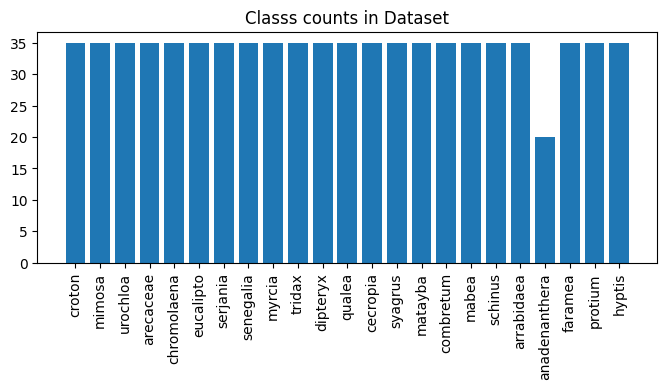

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,3))
plt.title('Classs counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

In [7]:
path_class={key:[] for key in classes.keys()}
for name in os.listdir(path):
  key= name.replace(' ','_').split('_')[0]
  path_class[key].append(os.path.join(path ,name))

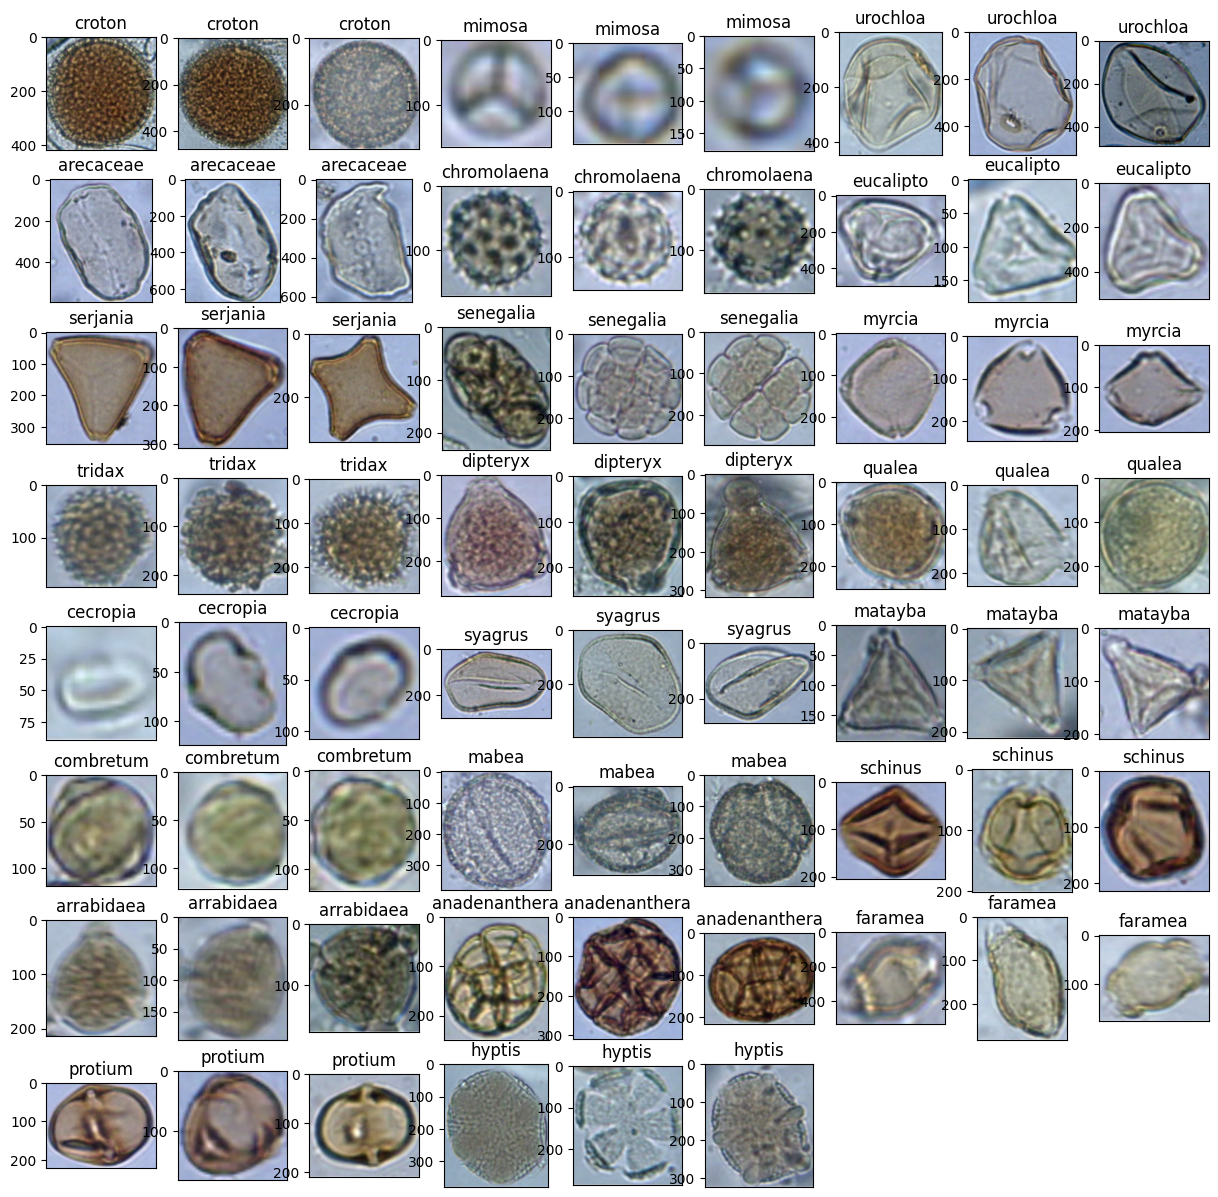

In [8]:
from PIL import Image
fig = plt.figure(figsize=(15,15))
for i, key in enumerate(path_class.keys()):
  img1= Image.open(path_class[key][0])
  img2= Image.open(path_class[key][1])
  img3= Image.open(path_class[key][2])
  ax= fig.add_subplot(8,9, 3*i+1)
  ax.set_xticks([])
  ax.set_ytick=([])
  ax.imshow(img1)
  ax.set_title(key)
  ax= fig.add_subplot(8,9, 3*i+2)
  ax.set_xticks([])
  ax.set_ytick=([])
  ax.imshow(img2)
  ax.set_title(key)
  ax= fig.add_subplot(8,9, 3*i+3)
  ax.set_xticks([])
  ax.set_ytick=([])
  ax.imshow(img3)
  ax.set_title(key)

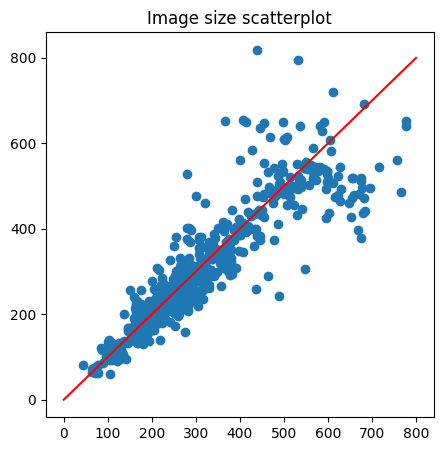

In [9]:
!pip install opencv-python
import cv2
import os
size= [cv2.imread(os.path.join(path ,name)).shape for name in os.listdir(path)]
x,y,_= zip(*size)
fig =plt.figure(figsize=(5,5))
#scatter plot
plt.scatter(x,y)
plt.title("Image size scatterplot")
#add diagonal red line
plt.plot([0,800],[0,800],'r')
plt.show()

In [10]:
#  IMAGE PRE-PROCESSING

import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

path="/root/.cache/kagglehub/datasets/andrewmvd/pollen-grain-image-classification/versions/1"

def process_img (img,size =(128,128)):
    img=cv2.resize(img,size) # resize images
    img=img/255 # devide values to 255
    return img

# Read all images and put in x variable, y variable is class names

x,y =[],[]
for name in os.listdir(path):
  img_path = os.path.join(path, name)
  img = cv2.imread(img_path)
  if img is not None:
    x.append(process_img(img))
    y.append(name.replace(' ','_').split('_')[0])
  else:
    print(f"Warning: Could not read image file: {img_path}")

x = np.array(x)

le = LabelEncoder()
Y_le = le.fit_transform(y)
Y_cat = to_categorical(Y_le, 23)

In [11]:
import cv2
def process_img (img,size =(128,128)):
    img=cv2.resize(img,size) # resize images
    img=img/255 # devide values to 255
    return img

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y_cat, test_size=0.285,stratify=Y_le)
print("Image in each class in Test set:{}".format(np.sum(Y_test, axis=0)))

Image in each class in Test set:[ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [13]:
# TRAINING THE MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

input_shape = X_train.shape[1:]
output_shape = 23

model = Sequential()
model.add(Input(shape=input_shape))  # 👈 Use Input layer explicitly

model.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(output_shape, activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,803 (16.09 MB)

 Trainable params: 4,218,803 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is Compiled!')

Model is Compiled!


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagener =ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,)
# fit data generator
datagener.fit(X_train)

In [16]:
    # TRAINING THE MODEL

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=4
epochs= 500
model_path='cnn.keras'
callbecks= [EarlyStopping(monitor ='val_loss', patience=20),
            ModelCheckpoint(filepath=model_path, save_best_only=True)]
history = model.fit(
    datagener.flow(X_train, Y_train, batch_size=batch_size),
    batch_size=batch_size,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_train, Y_train),
    callbacks=callbecks,
    verbose=1)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 37s 235ms/step - accuracy: 0.0445 - loss: 3.2274 - val_accuracy: 0.0479 - val_loss: 3.1336
Epoch 2/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step - accuracy: 0.0403 - loss: 3.1426 - val_accuracy: 0.0443 - val_loss: 3.1317
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.0215 - loss: 3.1401 - val_accuracy: 0.0833 - val_loss: 3.0676
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - accuracy: 0.0741 - loss: 3.0219 - val_accuracy: 0.0603 - val_loss: 3.0067
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.0923 - loss: 2.8063 - val_accuracy: 0.1578 - val_loss: 2.5432
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - accuracy: 0.0864 - loss: 2.7213 - val_accuracy: 0.1897 - val_loss: 2.3962
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.1413 - loss: 2.6086 - val_accuracy: 0.2039 - val_loss: 2.2632
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.1447 - loss: 2.462

In [17]:
model.load_weights(model_path)
score=model.evaluate(X_test,Y_test, verbose=0)
print('Test set accuracy: {}'. format(score[1]))

Test set accuracy: 0.8495575189590454


In [32]:
# model.save("model.h5")
model.save("my_model.keras")
# from tensorflow import keras
# keras.saving.save_model(model, "my_model.keras")

In [34]:
# test the model

from keras.utils import load_img, img_to_array
import numpy as np
import os

# Construct the correct path to the image file
image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'urochloa (35).jpg')

# Check if the file exists before attempting to load
if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img = img.resize((128, 128))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    a = np.argmax(model.predict(x), axis=1)

    # Assuming 'op' contains the class names in the correct order
    # You might need to define 'op' or 'class_names' based on how you encoded your labels
    # For now, I'll use a placeholder or the previously defined 'class_names' if available
    # If 'op' is defined in another cell, make sure that cell is executed before this one.
    try:
        # Using 'op' if it's defined
        result = op[a[0]]
        print(f"Predicted class: {result}")
    except NameError:
        # Using a generic message if 'op' is not defined
        print(f"Predicted class index: {a[0]}")
        print("Please define 'op' or 'class_names' with your class labels to get the class name.")

else:
    print(f"Error: Image file not found at {image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted class: anadenanthera


In [37]:
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

# Load image and resize (using a sample image path - update this if needed)
# Make sure the image path is correct for an image in your Google Drive
image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'urochloa (35).jpg') # Example path, update as needed

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img = img.resize((128, 128))

    # convert to array and preprocess
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Predict
    a = np.argmax(model.predict(x), axis=1)

    # Get the predicted class name
    result = op[a[0]]
    print(f"Predicted class: {result}")
else:
    print(f"Error: Image file not found at {image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: anadenanthera


In [38]:
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

# Load image and resize
image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'eucalipto_23.jpg') # Example path, update as needed

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img = img.resize((128, 128))

    # convert to array and preprocess
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Predict
    a = np.argmax(model.predict(x), axis=1)

    # Get the predicted class name
    result = op[a[0]]
    print(f"Predicted class: {result}")
else:
    print(f"Error: Image file not found at {image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: anadenanthera


In [39]:
# load image and resize
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
class_names = ['arecaceae','anadenanthera','arrabidaea','cecropia','chromolaena','combretum','croton','dipteryx','eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'anadenanthera_16.jpg')

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128,128))
    img = img.resize((128,128))

    # convert to array and preprocess
    x=img_to_array(img)
    x=np.expand_dims(x,axis=0)

    # Predict
    y_pred= model.predict(x)
    class_idx=np.argmax(y_pred,axis=1)[0]
    class_name= class_names[class_idx]
    print("Predicted class index:", class_idx)
    print("Predicted class name:", class_name)
else:
    print(f"Error: Image file not found at {image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class index: 1
Predicted class name: anadenanthera


In [40]:
# load image and resize
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
class_names = ['arecaceae','anadenanthera','arrabidaea','cecropia','chromolaena','combretum','croton','dipteryx','eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'croton_23.jpg')

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128,128))
    img = img.resize((128,128))

    # convert to array and preprocess
    x=img_to_array(img)
    x=np.expand_dims(x,axis=0)

    # Predict
    y_pred= model.predict(x)
    class_idx=np.argmax(y_pred,axis=1)[0]
    class_name= class_names[class_idx]
    print("Predicted class index:", class_idx)
    print("Predicted class name:", class_name)
else:
    print(f"Error: Image file not found at {image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class index: 1
Predicted class name: anadenanthera


In [41]:
# load image and resize
from keras.utils import load_img, img_to_array
import numpy as np
import os

# Define the full list of class names based on the dataset
class_names = ['arecaceae','anadenanthera','arrabidaea','cecropia','chromolaena','combretum','croton','dipteryx','eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']

image_path = os.path.join('drive', 'MyDrive', 'Colab Notebooks', 'data', 'hyptis_23.jpg')

if os.path.exists(image_path):
    img = load_img(image_path, target_size=(128,128))
    img = img.resize((128,128))

    # convert to array and preprocess
    x=img_to_array(img)
    x=np.expand_dims(x,axis=0)

    # Predict
    y_pred= model.predict(x)
    class_idx=np.argmax(y_pred,axis=1)[0]
    class_name= class_names[class_idx]
    print("Predicted class index:", class_idx)
    print("Predicted class name:", class_name)
else:
    print(f"Error: Image file not found at {image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class index: 1
Predicted class name: anadenanthera
